<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://files.oproject.org/tmvalogo.png" height="50%" width="50%">

# TMVA  Reader Example 

#### Example of applying the trained classified of TMVA on a data set and evaluate the classifier

In [1]:
import ROOT
from ROOT import TMVA

Welcome to JupyROOT 6.15/01


In [2]:
##%jsroot on

In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

### Choose TMVA method to evaluate

In [4]:
methodNames = ["BDT","DL_CPU","Keras_Dense","PyGTB"]

###  Give input file 


In [5]:
inputFile = ROOT.TFile("Higgs_data.root")

In [6]:
inputFile.ls()
#inputFile.sig_tree.Print()

TFile**		Higgs_data.root	
 TFile*		Higgs_data.root	
  KEY: TTree	sig_tree;1	tree
  KEY: TTree	bkg_tree;1	tree


### Declare Reader


In [7]:
TMVA.Tools.Instance()
TMVA.PyMethodBase.PyInitialize();

reader = TMVA.Reader( "!Color:!Silent" )


### Add Variable

We add variables to the reader exactly in the same way we did for the **DataLoader** during the training

We need to specify the address of the variable in order to pass it to TMVA when we iterate on the TTree


In [8]:
from array import array
m_jj = array('f',[0])
m_jjj = array('f',[0])
m_lv = array('f',[0])
m_jlv = array('f',[0])
m_bb = array('f',[0])
m_wbb = array('f',[0])
m_wwbb = array('f',[0])

In [9]:
#add variables 
reader.AddVariable("m_jj",m_jj)
reader.AddVariable("m_jjj",m_jjj)
reader.AddVariable("m_lv",m_lv)
reader.AddVariable("m_jlv",m_jlv)
reader.AddVariable("m_bb",m_bb)
reader.AddVariable("m_wbb",m_wbb)
reader.AddVariable("m_wwbb",m_wwbb)


## Setup Classifiers

We set up the classifiers by reading the input weights from the appropriate files

The file is stored for example as 

####  *dataset/weights/TMVAClassification_BDT.weights.xml

In [10]:
for methodName in methodNames: 
    weightfile = "dataset/weights/TMVA_Higgs_Classification_" + methodName + ".weights.xml"
    name = ROOT.TString(methodName)
    reader.BookMVA( name, weightfile );

Using TensorFlow backend.


                         : Booking "BDT" of type "BDT" from dataset/weights/TMVA_Higgs_Classification_BDT.weights.xml.
                         : Reading weight file: dataset/weights/TMVA_Higgs_Classification_BDT.weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDT" of type: "BDT"
                         : Booking "DL_CPU" of type "DL" from dataset/weights/TMVA_Higgs_Classification_DL_CPU.weights.xml.
                         : Reading weight file: dataset/weights/TMVA_Higgs_Classification_DL_CPU.weights.xml
                         : Booked classifier "DL_CPU" of type: "DL"
                         : Booking "Keras_Dense" of type "PyKeras" from dataset/weights/TMVA_Higgs_Classification_Keras_Dense.weights.xml.
                         : Reading weight file: dataset/weights/TMVA_Higgs_Classification_Keras_Dense.weights.xml
             

2018-09-19 10:09:07.414424: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA


### Book histogram to visualize the response

In [11]:
hs = {}
hb = {}
for name in methodNames:
    hname = "hsig_" + name
    htitle = "Classifier Output for " + name 
    hs[name] = ( ROOT.TH1D(hname,htitle,100,-1,1) )
    hname = "hbkg_" + name
    hb[name] = (ROOT.TH1D(hname,htitle,100,-1,1) )

## Iterate on the events from the input TTree 

### Evaluation of the classifier on the given input events

We iterate on the input event in the given TTree. We provide as input first the background tree 
We return the output results for the various methods in big numpy array [ number of methods x number of events]
We also fill an histogram for each method.
Note that is important to fill the arrays with the tree entries in order to pass the values to the TMVA::Reader

In [12]:
import numpy as np

In [13]:

nevt = inputFile.bkg_tree.GetEntries()

vout = np.arange( nevt * len(methodNames), dtype='float').reshape( len(methodNames), nevt)
ievt = 0
for entry in inputFile.bkg_tree:
    m_jj[0] = entry.m_jj
    m_jjj[0] = entry.m_jjj
    m_lv[0] = entry.m_lv
    m_jlv[0] = entry.m_jlv
    m_bb[0] = entry.m_bb
    m_wbb[0] = entry.m_wbb
    m_wwbb[0] = entry.m_wwbb
    
    i = 0
    for methodName in methodNames : 
        vout[i,ievt] = reader.EvaluateMVA(methodName)
        hb[methodName].Fill(vout[i,ievt])        
        if (ievt%1000)==0 : print 'Event ',ievt,' MVA output for ',methodName,' =',vout[i,ievt]
        i += 1
        
    ievt += 1
#    if (ievt > 20000) : break
    

Event  0  MVA output for  BDT  = 0.165350907588
Event  0  MVA output for  DL_CPU  = 0.697432518005
Event  0  MVA output for  Keras_Dense  = 0.76417940855
Event  0  MVA output for  PyGTB  = 0.647405894998
Event  1000  MVA output for  BDT  = 0.140806048602
Event  1000  MVA output for  DL_CPU  = 0.598757088184
Event  1000  MVA output for  Keras_Dense  = 0.576208591461
Event  1000  MVA output for  PyGTB  = 0.751657432983
Event  2000  MVA output for  BDT  = -0.16743432812
Event  2000  MVA output for  DL_CPU  = 0.251279115677
Event  2000  MVA output for  Keras_Dense  = 0.205117329955
Event  2000  MVA output for  PyGTB  = 0.297850675798
Event  3000  MVA output for  BDT  = -0.125963499152
Event  3000  MVA output for  DL_CPU  = 0.326766073704
Event  3000  MVA output for  Keras_Dense  = 0.369150876999
Event  3000  MVA output for  PyGTB  = 0.283243205167
Event  4000  MVA output for  BDT  = 0.162123734646
Event  4000  MVA output for  DL_CPU  = 0.627530813217
Event  4000  MVA output for  Keras_Dens

In [14]:
print vout
bkg_result = vout

[[ 0.16535091 -0.23339984 -0.0260511  ..., -0.00653011 -0.50357643
   0.06607487]
 [ 0.69743252  0.19758229  0.39965579 ...,  0.56422424  0.0266454
   0.53953916]
 [ 0.76417941  0.19090085  0.40063795 ...,  0.65160662  0.02978987
   0.66070086]
 [ 0.64740589  0.10777924  0.48447225 ...,  0.45347727  0.05866211
   0.51386542]]


### Evaluation on the signal  events

We evaluate now the classifier on the another tree (e.g. the signal events)



In [15]:
nevt = inputFile.sig_tree.GetEntries()

vout = np.arange( nevt * len(methodNames), dtype='float').reshape( len(methodNames), nevt)
ievt = 0
for entry in inputFile.sig_tree:
    m_jj[0] = entry.m_jj
    m_jjj[0] = entry.m_jjj
    m_lv[0] = entry.m_lv
    m_jlv[0] = entry.m_jlv
    m_bb[0] = entry.m_bb
    m_wbb[0] = entry.m_wbb
    m_wwbb[0] = entry.m_wwbb
    
    i = 0
    for methodName in methodNames : 
        vout[i,ievt] = reader.EvaluateMVA(methodName)
        hs[methodName].Fill(vout[i,ievt])
        if (ievt%1000)==0 : print 'Event ',ievt,' MVA output for ',methodName,' =',vout[i,ievt]
        i += 1
        
    ievt += 1
#    if (ievt > 20000) : break
    
    
sig_result = vout
print(sig_result)

Event  0  MVA output for  BDT  = 0.0755062993678
Event  0  MVA output for  DL_CPU  = 0.614324510098
Event  0  MVA output for  Keras_Dense  = 0.694843947887
Event  0  MVA output for  PyGTB  = 0.570058777096
Event  1000  MVA output for  BDT  = -0.109040247822
Event  1000  MVA output for  DL_CPU  = 0.579502165318
Event  1000  MVA output for  Keras_Dense  = 0.646471917629
Event  1000  MVA output for  PyGTB  = 0.472240408508
Event  2000  MVA output for  BDT  = -0.0222021669562
Event  2000  MVA output for  DL_CPU  = 0.739202022552
Event  2000  MVA output for  Keras_Dense  = 0.821829378605
Event  2000  MVA output for  PyGTB  = 0.642833233215
Event  3000  MVA output for  BDT  = -0.0260826323729
Event  3000  MVA output for  DL_CPU  = 0.411046236753
Event  3000  MVA output for  Keras_Dense  = 0.352243512869
Event  3000  MVA output for  PyGTB  = 0.435252358925
Event  4000  MVA output for  BDT  = -0.0888159977501
Event  4000  MVA output for  DL_CPU  = 0.494650930166
Event  4000  MVA output for  Ke

### Plot Histogram of output variables

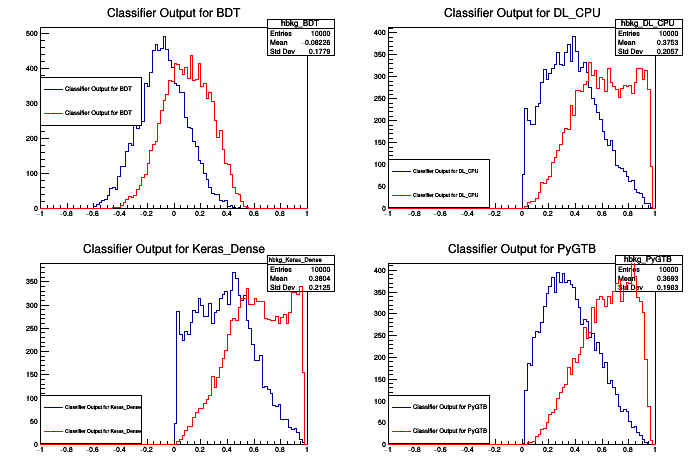

In [16]:
c1 = ROOT.TCanvas()
c1.DivideSquare( len(hb))
ipad = 0
for name in methodNames: 
    ipad += 1
    pad = c1.cd(ipad)
    h1 = hb[name]
    h1.Draw()
    h2 = hs[name]
    h2.SetLineColor(ROOT.kRed)
    h2.Draw('Same')
    pad.BuildLegend()
    
c1.Draw()

### Computing ROC Curve

We compute here the ROC curve from the vector of the classifier output for signal and background events. 
The interface for the TMVA::ROCCurve class requires  a std::vector of float types

In [22]:
i = 0
roc = []
c2 = ROOT.TCanvas()
for name in methodNames: 
    vsig = ROOT.std.vector('float')(nevt)
    vbkg = ROOT.std.vector('float')(nevt)
    for ievt in range(0,nevt): 
        vsig[ievt] = sig_result[i,ievt]
        vbkg[ievt] = bkg_result[i,ievt]
    roc.append ( TMVA.ROCCurve(vsig,vbkg) )
    print name,' ROC Integral ',roc[i].GetROCIntegral()
    gr = roc[i].GetROCCurve()
    gr.SetLineColor(i+1)
    gr.SetTitle(name)
    if (i==0): 
        gr.Draw('AL')
    else:
        gr.Draw("L")
    i += 1
    


BDT  ROC Integral  0.760342465
DL_CPU  ROC Integral  0.780263305
Keras_Dense  ROC Integral  0.779635705
PyGTB  ROC Integral  0.822843145


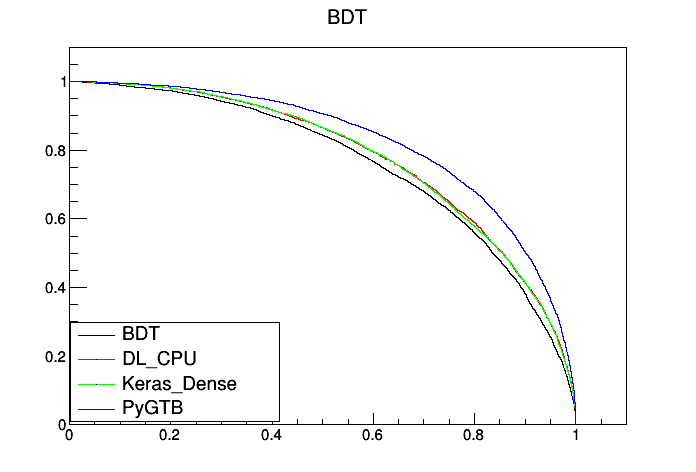

In [23]:
c2.BuildLegend()
c2.Draw()

In [19]:
inputFile.sig_tree


<ROOT.TTree object ("sig_tree") at 0x7fba52713b60>

In [20]:
a = inputFile.sig_tree.AsMatrix(['m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb'])

In [21]:
print a

[[ 1.35376     0.97956312  0.97807616 ...,  0.72165745  0.98875093
   0.87667835]
 [ 0.3022199   0.83304816  0.98569965 ...,  0.77973217  0.99235576
   0.79834259]
 [ 0.90975326  1.10833049  0.9856922  ...,  0.8032515   0.86592442
   0.78011757]
 ..., 
 [ 0.78733569  0.97868377  0.98237854 ...,  0.96853018  0.93126822
   0.91213906]
 [ 0.92211759  1.03808665  0.98750263 ...,  0.46553683  0.80048835
   0.80058527]
 [ 0.7312851   1.06170535  1.07203448 ...,  0.87044066  1.11418879
   0.96912521]]


In [24]:
len(a)

10000